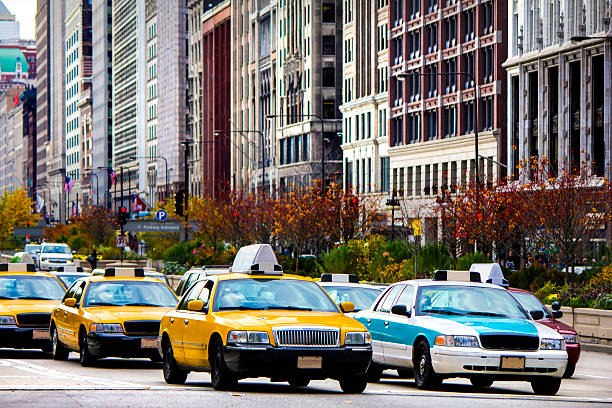

# Projeto: Taxi em Chicago

*Bem-vindo ao Zuber, a nova empresa de compartilhamento de carros de Chicago! Como analista, sua missão é desvendar os segredos das viagens de táxi na cidade. Vamos explorar o banco de dados repleto de informações sobre corridas e explorar com mais detalhes o impacto do clima nas viagens. Prepare-se para uma viagem de descobertas com modelos e informações que irão aprimorar nossos serviços e tornar a viagem mais agradável para nossos passageiros. Vamos começar!*

# ***Dicionário de dados***

**Tabela company (project_sql_result_01.csv):**

- `company_name`: nome da empresa de táxi (tipo object)
- `trips_amount`: o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017 (tipo int64)

**Tabela dropoff (project_sql_result_04.csv):**

- `dropoff_location_name`: bairros de Chicago onde as corridas terminaram (tipo object)
- `average_trips`: o número médio de viagens que terminaram em cada bairro em novembro de 2017 (tipo foloat64)

**Tabela viagens (project_sql_result_07.csv):**

- `start_ts`: data e hora do começo da corrida (tipo object)
- `weather_conditions`: condições meteorológicas em que a corrida começou (tipo object)
- `duration_seconds`: duração da viagem em segundos (tipo float64)

## Iniciação do projeto

In [1]:
# importação das bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import plotly.express as px

In [2]:
# carregamento do dados
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
df_viagens = pd.read_csv('/datasets/project_sql_result_07.csv')

### Dataframe Company

In [3]:
# informações gerais
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# informações métricas
df_company.describe()

trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

In [5]:
# tamanho do dataframe
df_company.shape

(64, 2)

In [6]:
# olhando as primeiras linhas do dataframe df_company
df_company.head()

company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

In [7]:
# verificando os nomes das colunas
df_company.columns

Index(['company_name', 'trips_amount'], dtype='object')

In [8]:
# verificando valores únicos
df_company['company_name'].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

In [9]:
# verificando se há dados duplicados
df_company.duplicated().sum()

0

In [10]:
# verificando se há dados ausentes
df_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

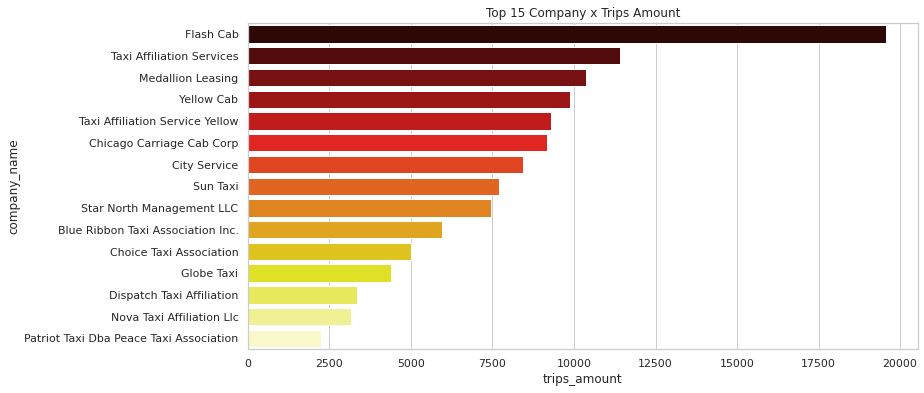

In [11]:
# criando top 15
top15_company = df_company.sort_values(by='trips_amount', ascending=False).head(15)
# plotando
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=top15_company, palette='hot')
plt.title('Top 15 Company x Trips Amount')
plt.show()

**Overview do dataframe df_company:**

- *há duas colunas `company_name` e `trips_amount`, ambas possuem 64 linhas*;
- *a coluna `company_name` é do tipo object e a coluna `trips_amount` é do tipo int64*;
- *sem dados duplicados no dataframe*;
- *sem dados ausentes no dataframe*;
- *grande diferença entre média e mediana em trips_amount*
- *company `Flash Cab` tem excelente performancetem excelente performance`*

### Dataframe Dropoff

In [12]:
# informações gerais
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [13]:
# informações métricas
df_dropoff.describe()

average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

In [14]:
# tamanho do dataframe
df_dropoff.shape

(94, 2)

In [15]:
# olhando as primeiras linhas do dataframe df_dropoff
df_dropoff.head()

dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

In [16]:
# verificando os nomes das colunas
df_dropoff.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

In [17]:
# verificando valores únicos
df_dropoff['dropoff_location_name'].unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

In [18]:
# verificando se há dados duplicados
df_dropoff.duplicated().sum()

0

In [19]:
# verificando se há dados ausentes
df_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

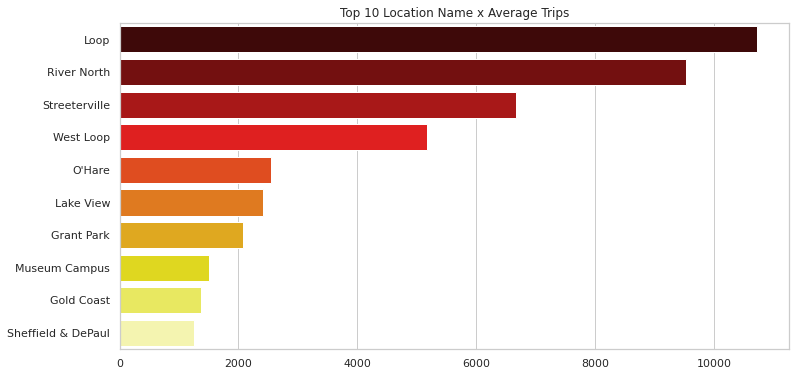

In [20]:
# criando top 10 destinos
top10_location = df_dropoff.sort_values(by='average_trips', ascending=False).head(10)

# plotando
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top10_location, palette='hot')
plt.title('Top 10 Location Name x Average Trips')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Overview do dataframe df_dropoff:**

- *há duas colunas `dropoff_location_name` e `average_trips`, ambas possuem 94 linhas*;
- *a coluna `dropoff_location_name` é do tipo object e a coluna `average_trips` é do tipo float64*;
- *sem dados duplicados no dataframe*;
- *sem dados ausentes no dataframe*;
- *corridas para a região `River North`, `Streeterville` e `Loop` possuem as maiores médias de viagens`;
- *o termo `Loop` refere-se a área do distrito de negócios do centro de cidade, onde frequentemente atendem a área central, que inclui muitos escritórios, hotéis, restaurantes, atrações turísticas e podem estar sujeitos a regulamentações e tarifas específicas*

### Dataframe Viagens

In [21]:
# informações gerais
df_viagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [22]:
# informações métricas
df_viagens.describe()

duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000

In [23]:
# tamanho do dataframe
df_viagens.shape

(1068, 3)

In [24]:
# olhando as primeiras linhas do dataframe df_dropoff
df_viagens.head()

start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

In [25]:
# verificando os nomes das colunas
df_viagens.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

In [26]:
# verificando os valores únicos
df_viagens['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [27]:
# verificando o formato
df_viagens.start_ts.dtypes

dtype('O')

In [28]:
# alterando o formato
df_viagens['start_ts'] = pd.to_datetime(df_viagens['start_ts'])

In [29]:
# verificando se há dados ausentes
df_viagens.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [30]:
# verificando se há dados duplicados
df_viagens.duplicated().sum()

197

*Temos duplicados, vamos olhar mais de perto.*

In [31]:
# selecionando os dados duplicados
duplicated = df_viagens[df_viagens.duplicated(keep=False)]
duplicated

start_ts weather_conditions  duration_seconds
4    2017-11-11 07:00:00               Good            1440.0
8    2017-11-11 14:00:00               Good            2460.0
10   2017-11-18 06:00:00               Good            1500.0
16   2017-11-04 12:00:00               Good            2640.0
23   2017-11-04 14:00:00               Good            3360.0
...                  ...                ...               ...
1054 2017-11-11 07:00:00               Good            1380.0
1058 2017-11-25 12:00:00               Good            1440.0
1062 2017-11-11 06:00:00               Good            1500.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0

[312 rows x 3 columns]

In [32]:
# mais uma amostra
duplicated = duplicated.sort_values(by='duration_seconds', ascending=False)
duplicated.head(15)
duplicated.tail(15)

start_ts weather_conditions  duration_seconds
231 2017-11-04 07:00:00               Good            1200.0
835 2017-11-11 10:00:00               Good            1200.0
845 2017-11-11 08:00:00               Good            1200.0
478 2017-11-11 07:00:00               Good            1200.0
462 2017-11-04 05:00:00               Good            1200.0
450 2017-11-11 06:00:00               Good            1200.0
289 2017-11-11 10:00:00               Good            1200.0
913 2017-11-11 08:00:00               Good            1200.0
720 2017-11-11 10:00:00               Good            1200.0
207 2017-11-11 08:00:00               Good            1200.0
541 2017-11-04 05:00:00               Good            1200.0
603 2017-11-11 08:00:00               Good            1140.0
979 2017-11-04 07:00:00               Good            1140.0
71  2017-11-11 08:00:00               Good            1140.0
332 2017-11-04 07:00:00               Good            1140.0

In [33]:
# calculando porcentagem de duplicados
len(duplicated) / df_viagens.shape[0]

0.29213483146067415

In [34]:
# removendo duplicados
df_viagens = df_viagens.drop_duplicates()

In [35]:
# contando corridas onde o duration_seconds é zero
df_duration_seconds_equal_zero = df_viagens.loc[ df_viagens['duration_seconds'] == 0]
df_duration_seconds_equal_zero

start_ts weather_conditions  duration_seconds
163  2017-11-11 09:00:00               Good               0.0
168  2017-11-11 07:00:00               Good               0.0
204  2017-11-18 19:00:00               Good               0.0
552  2017-11-04 01:00:00               Good               0.0
801  2017-11-04 09:00:00               Good               0.0
1063 2017-11-25 11:00:00               Good               0.0

In [36]:
# removendo com seconds = 0
df_viagens = df_viagens[df_viagens['duration_seconds'] != 0]

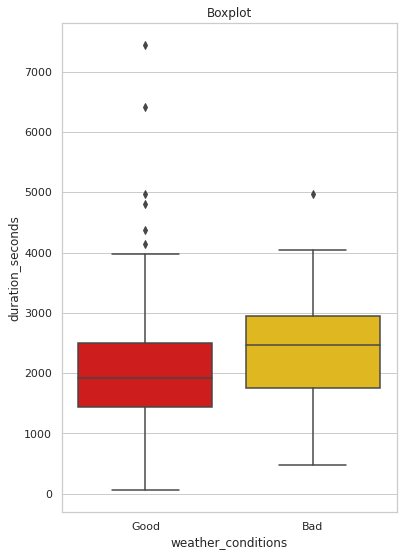

In [37]:
# filtrando
df_bad = df_viagens[df_viagens['weather_conditions'] == 'Bad']
df_good = df_viagens[df_viagens['weather_conditions'] == 'Good']

# plotando
sns.set(style="whitegrid", palette="copper")
plt.figure(figsize=(6, 9))
plt.title('Boxplot')
sns.boxplot(x='weather_conditions', y='duration_seconds', data=df_viagens, palette="hot")
plt.show()

**Overview do dataframe df_dropoff:**

- *há três colunas `start_ts`, `weather_conditions` e `duration_seconds`, as três possuem 1068 linhas*;
- *as colunas `start_ts` e `weather_conditions` são do tipo object e a coluna `duration_seconds` é do tipo float64*;
- *sem dados ausentes no dataframe*;
- *há dados duplicados, eles representavam quase 30% do dataframe*;
- *alteramos a coluna start_ts para datetime*;
- *média e mediana mais próximas na coluna duration_seconds, mas com desvio padrão relevante*;
- *coluna `weather_conditions` com apenas 2 valores únicos: `Good` e `Bad`*;
- *removemos do dataframe onde o tempo de duração da 'corrida' era 0 segundos*;
- *identificamos outliers e mais alguns insights com a geração dos boxplots*.

## Começando EDA - Análise Exploratória dos Dados

### df_company

In [38]:
# olhando novamente os dados
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [39]:
# Calculando as médias, medianas, variâncias e desvios padrão
mean_value = df_company['trips_amount'].mean()
median_value = df_company['trips_amount'].median()
variance_value = df_company['trips_amount'].var()
std_deviation_value = df_company['trips_amount'].std()

In [40]:
# imprimindo...
print(f'Dados df_company da coluna trips_amount:')
print(f'média -> {round(mean_value, 2)}')
print(f'mediana -> {round(median_value, 2)}')
print(f'variância -> {round(variance_value, 2)}')
print(f'desvio padrão -> {round(std_deviation_value, 2)}')

Dados df_company da coluna trips_amount:
média -> 2145.48
mediana -> 178.5
variância -> 14533708.95
desvio padrão -> 3812.31


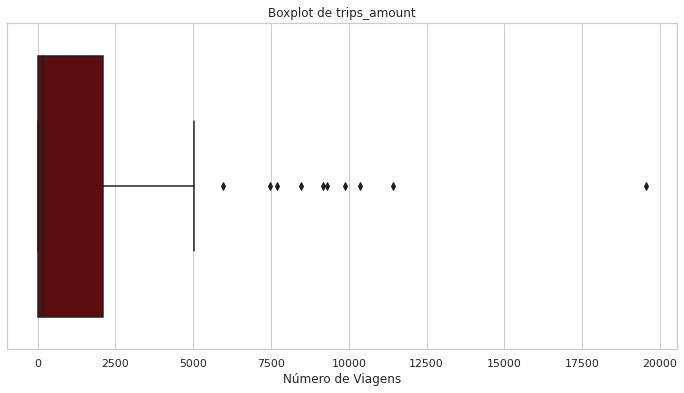

In [41]:
# boxplot
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_company, x='trips_amount')
plt.title('Boxplot de trips_amount')
plt.xlabel('Número de Viagens')
plt.show()

*Temos outliers e iremos tratá-los.*

In [42]:
# calculando
Q1 = df_company['trips_amount'].quantile(0.25)
Q3 = df_company['trips_amount'].quantile(0.75)
IQR = Q3 - Q1

# definindo limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# df_company_without_outliers
df_company_without_outliers = df_company[(df_company['trips_amount'] >= lower_limit) & 
                                         (df_company['trips_amount'] <= upper_limit)]

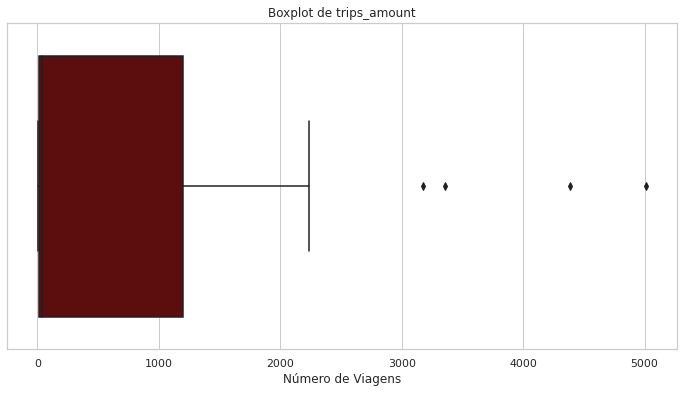

In [43]:
# boxplot without outliers
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_company_without_outliers, x='trips_amount')
plt.title('Boxplot de trips_amount')
plt.xlabel('Número de Viagens')
plt.show()

In [44]:
# dividindo em 4 grupos
quartiles = df_company_without_outliers['trips_amount'].quantile([0, 0.25, 0.5, 0.75, 1])
labels = ['Q4', 'Q3', 'Q2', 'Q1']
df_company_without_outliers['quartile'] = pd.cut(df_company_without_outliers['trips_amount'], bins=quartiles, labels=labels)

/tmp/ipykernel_194/416039660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company_without_outliers['quartile'] = pd.cut(df_company_without_outliers['trips_amount'], bins=quartiles, labels=labels)


In [45]:
# verificando...
df_company_without_outliers.info()
df_company_without_outliers.head()
# preenchendo 1 valor Nan após pd.cut
df_company_without_outliers = df_company_without_outliers.fillna("Q4")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 10 to 63
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   company_name  54 non-null     object  
 1   trips_amount  54 non-null     int64   
 2   quartile      53 non-null     category
dtypes: category(1), int64(1), object(1)
memory usage: 1.5+ KB


In [46]:
# selecionando os grupos para plotar
q1 = df_company_without_outliers.loc[df_company_without_outliers['quartile'] == 'Q1']
q2 = df_company_without_outliers.loc[df_company_without_outliers['quartile'] == 'Q2']
q3 = df_company_without_outliers.loc[df_company_without_outliers['quartile'] == 'Q3']
q4 = df_company_without_outliers.loc[df_company_without_outliers['quartile'] == 'Q4']

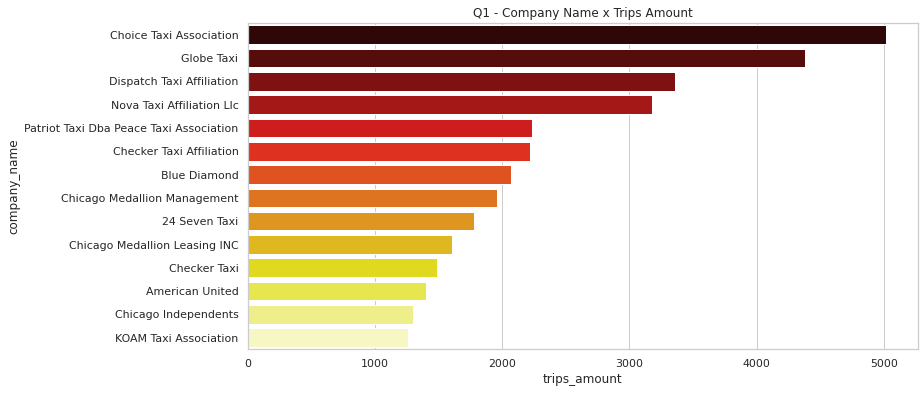

In [47]:
# plotando por quartile Q1
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q1, palette='hot')
plt.title('Q1 - Company Name x Trips Amount')
plt.show()

*Afiliações e Associações conseguem facilmente passar de 2000 corridas no grupo Q1.*

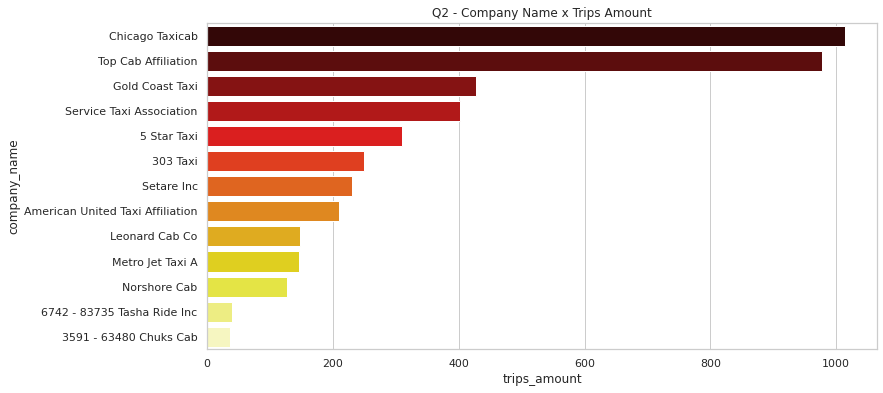

In [48]:
# plotando por quartile Q2
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q2, palette='hot')
plt.title('Q2 - Company Name x Trips Amount')
plt.show()

*`Top Cab Affiliation` em 2° lugar com quase 1000 corridas no Q2.*

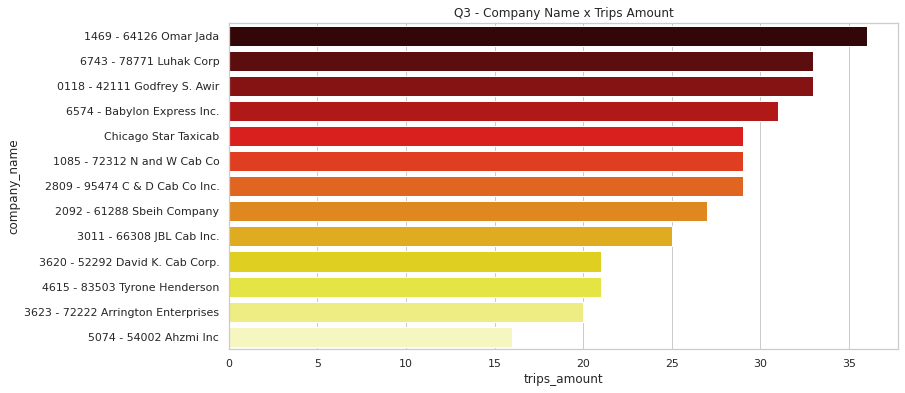

In [49]:
# plotando por quartile Q3
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q3, palette='hot')
plt.title('Q3 - Company Name x Trips Amount')
plt.show()

*No Q3 começam a aparecer nomes de pessoas 'comuns' e não empresas, mas com a quantidade de corridas muito abaixo dos Q1 e Q2.*

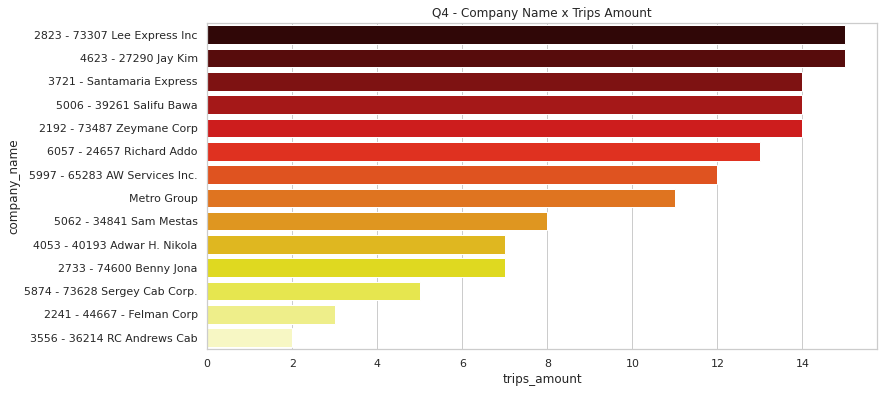

In [50]:
# plotando por quartile Q4
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=q4, palette='hot')
plt.title('Q4 - Company Name x Trips Amount')
plt.show()

*Novamente chegamos a mesma conclusão do Q3 aqui no Q4.*

#### Comparando Q1, Q2, Q3 e Q4

In [51]:
# agrupando para calcular algumas métricas
grouped = df_company_without_outliers.groupby('quartile')['trips_amount'].agg(['sum', 'mean', 'median', 'std', 'var'])
grouped = grouped.sort_values(by='mean', ascending=False).reset_index()

grouped

quartile    sum         mean  median          std           var
0       Q1  33231  2373.642857  2012.5  1176.991838  1.385310e+06
1       Q2   4318   332.153846   230.0   317.906130  1.010643e+05
2       Q3    350    26.923077    29.0     5.964639  3.557692e+01
3       Q4    140    10.000000    11.5     4.574175  2.092308e+01

In [52]:
# treemap com a library plotly
fig = px.treemap(grouped, path=['quartile'], values='sum', 
                 color_discrete_sequence=px.colors.sequential.RdBu, 
                 width=888, height=444, title='Treemap - Soma da Quantidade de Viagens por Quartile (Q1, Q2, Q3 e Q4)')
fig.show()

*Q1 é dominante, quase um monopólio de corridas na cidade, melhor ficar de olhos nestes concorrentes!*

#### Analisando a quantidade de viagens das empresas Associadas ou com Afiliações

In [53]:
# verificando trips_amount por "association/affiliation" tanto no df quanto no df sem outliers e comparando...

# df_company
filtered_1 = df_company['company_name'].str.contains('association|affiliation', case=False)
companies_filtered_1 = df_company[filtered_1]

# df_company_without_outliers
filtered_2 = df_company_without_outliers['company_name'].str.contains('association|affiliation', case=False)
companies_filtered_2 = df_company_without_outliers[filtered_2]

In [54]:
# calculando proporção com o df_company
prop_1 = companies_filtered_1.trips_amount.sum() / df_company.trips_amount.sum()
print(f'As empresas com nomes "association/affiliation" possuem {round(prop_1, 3) * 100}% da quantidade total de viagens do Dataframe original.')

# calculando proporção com o df_company_without_outliers
prop_2 = companies_filtered_2.trips_amount.sum() / df_company_without_outliers.trips_amount.sum()
print(f'As empresas com nomes "association/affiliation" possuem {round(prop_2, 3) * 100}% da quantidade total de viagens do Dataframe removido os outliers.')

As empresas com nomes "association/affiliation" possuem 33.2% da quantidade total de viagens do Dataframe original.
As empresas com nomes "association/affiliation" possuem 49.5% da quantidade total de viagens do Dataframe removido os outliers.


**Overview de df_company:**
- *novamente sem dados ausentes, mas com dados duplicados*
- *identificamos possíveis concorrentes fortíssimos, associações e afiliações*
- *tínhamos outliers e os tratamos*

### df_dropoff

In [55]:
# olhando os dados novamente
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [56]:
# Calculando as médias, medianas, variâncias e desvios padrão
mean_value = df_dropoff['average_trips'].mean()
median_value = df_dropoff['average_trips'].median()
variance_value = df_dropoff['average_trips'].var()
std_deviation_value = df_dropoff['average_trips'].std()

In [57]:
# top 15
df_dropoff_t15 = df_dropoff.sort_values(by='average_trips', ascending=False)
df_dropoff_t15 = df_dropoff_t15.head(15)

In [58]:
# imprimindo...
print(f'Dados df_dropoff da coluna average_trips:')
print(f'média -> {round(mean_value, 2)}')
print(f'mediana -> {round(median_value, 2)}')
print(f'variância -> {round(variance_value, 2)}')
print(f'desvio padrão -> {round(std_deviation_value, 2)}')

Dados df_dropoff da coluna average_trips:
média -> 599.95
mediana -> 52.02
variância -> 2939822.63
desvio padrão -> 1714.59


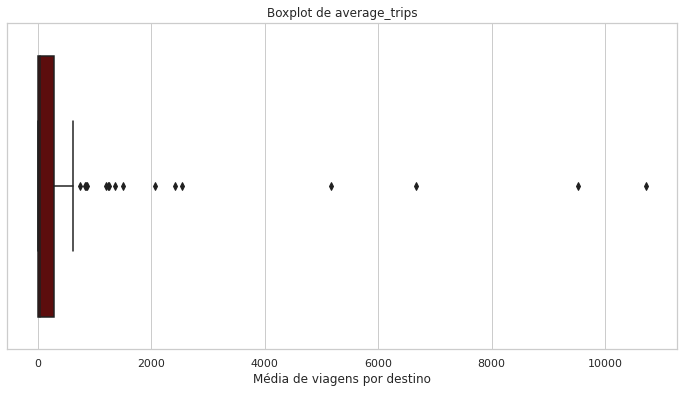

In [59]:
# gerando boxplot
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dropoff, x='average_trips')
plt.title('Boxplot de average_trips')
plt.xlabel('Média de viagens por destino')
plt.show()

*Tratando outliers.*

In [60]:
# calculando e definindo limites
Q1 = df_dropoff['average_trips'].quantile(0.25)
Q3 = df_dropoff['average_trips'].quantile(0.75)
IQR = Q3 - Q1

# limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# df_location_without_outliers
df_dropoff_without_outliers = df_dropoff[(df_dropoff['average_trips'] >= lower_limit) & 
                                           (df_dropoff['average_trips'] <= upper_limit)]

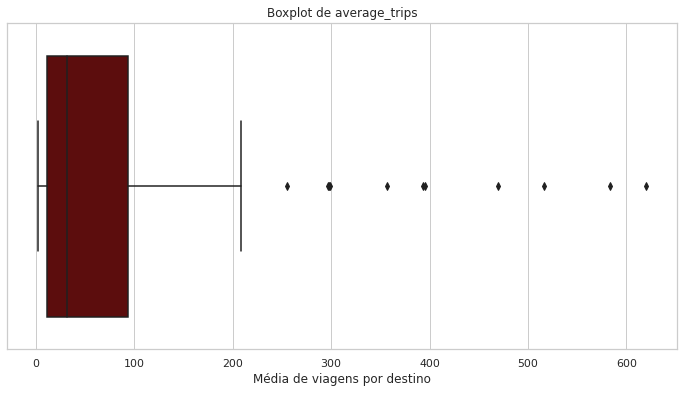

In [61]:
# boxplot refinado
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_dropoff_without_outliers, x='average_trips')
plt.title('Boxplot de average_trips')
plt.xlabel('Média de viagens por destino')
plt.show()

*Vamos dividir em quartis para mais análises.*

In [62]:
# dividindo em 4 grupos
quartiles = df_dropoff_without_outliers['average_trips'].quantile([0, 0.25, 0.5, 0.75, 1])
labels = ['Q4', 'Q3', 'Q2', 'Q1']

df_dropoff_without_outliers['quartile'] = pd.cut(df_dropoff_without_outliers['average_trips'], bins=quartiles, labels=labels)

/tmp/ipykernel_194/1625870142.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
# certificando
df_dropoff_without_outliers.info()
df_dropoff_without_outliers.tail()

# preenchendo 1 valor Nan após pd.cut
df_dropoff_without_outliers = df_dropoff_without_outliers.fillna("Q4")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 16 to 93
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dropoff_location_name  78 non-null     object  
 1   average_trips          78 non-null     float64 
 2   quartile               77 non-null     category
dtypes: category(1), float64(1), object(1)
memory usage: 2.1+ KB


In [64]:
# selecionando os grupos para plotar
q1 = df_dropoff_without_outliers.loc[df_dropoff_without_outliers['quartile'] == 'Q1']
q2 = df_dropoff_without_outliers.loc[df_dropoff_without_outliers['quartile'] == 'Q2']
q3 = df_dropoff_without_outliers.loc[df_dropoff_without_outliers['quartile'] == 'Q3']
q4 = df_dropoff_without_outliers.loc[df_dropoff_without_outliers['quartile'] == 'Q4']

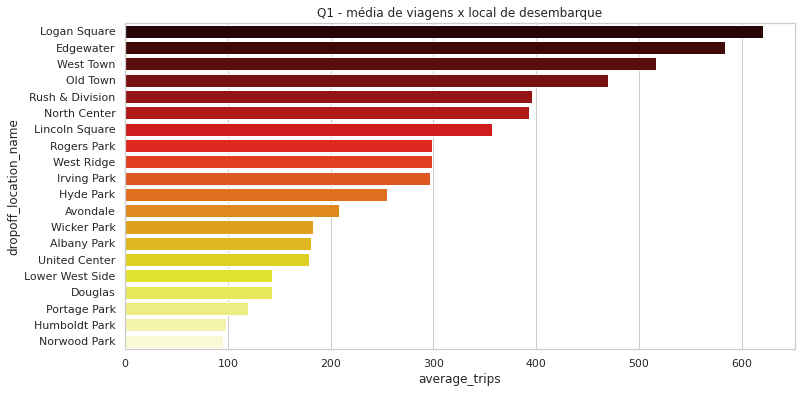

In [65]:
# plotando por quartile Q1
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q1, palette='hot')
plt.title('Q1 - média de viagens x local de desembarque')
plt.show()

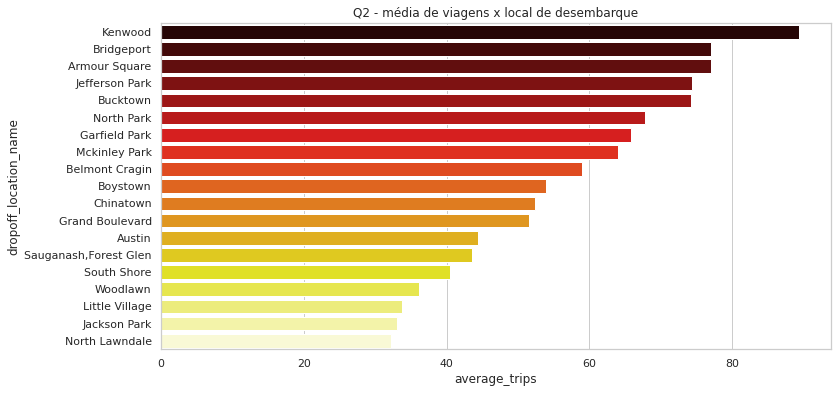

In [66]:
# plotando por quartile Q2
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q2, palette='hot')
plt.title('Q2 - média de viagens x local de desembarque')
plt.show()

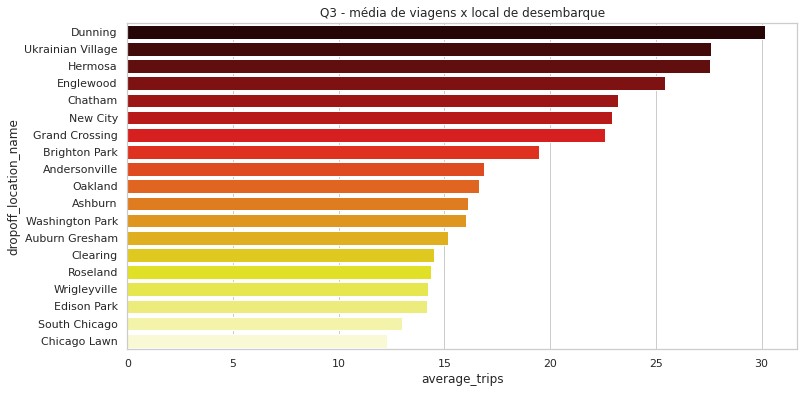

In [67]:
# plotando por quartile Q3
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q3, palette='hot')
plt.title('Q3 - média de viagens x local de desembarque')
plt.show()

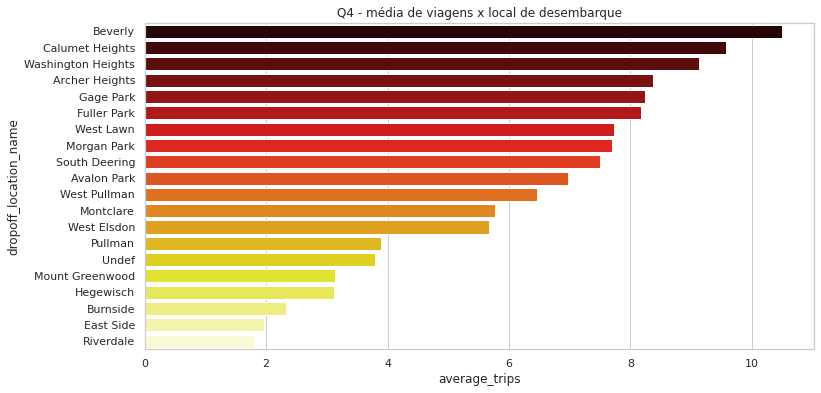

In [68]:
# plotando por quartile Q4
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=q4, palette='hot')
plt.title('Q4 - média de viagens x local de desembarque')
plt.show()

#### Contrastando Q1, Q2, Q3 e Q4

In [69]:
# agrupando para calcular algumas métricas
grouped = df_dropoff_without_outliers.groupby('quartile')['average_trips'].agg(['sum', 'mean', 'median', 'std', 'var'])
grouped = grouped.sort_values(by='mean', ascending=False).reset_index()

grouped

quartile          sum        mean      median         std           var
0       Q1  5833.866667  291.693333  275.850000  161.525484  26090.481942
1       Q2  1070.570115   56.345796   53.966667   17.513670    306.728651
2       Q3   362.333333   19.070175   16.633333    5.630417     31.701592
3       Q4   121.813668    6.090683    6.716667    2.719592      7.396183

### df_viagens

In [70]:
# informações
df_viagens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            865 non-null    datetime64[ns]
 1   weather_conditions  865 non-null    object        
 2   duration_seconds    865 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.3+ KB


In [71]:
# mais informações
df_viagens.head()

start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0

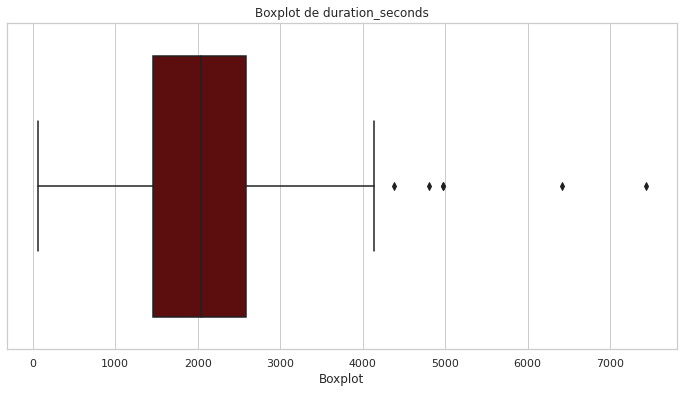

In [72]:
# boxplot de duration_seconds
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_viagens, x='duration_seconds')
plt.title('Boxplot de duration_seconds')
plt.xlabel('Boxplot')
plt.show()

*Verificaremos os outliers.*

In [73]:
# calculando e definindo limites
Q1 = df_viagens['duration_seconds'].quantile(0.25)
Q3 = df_viagens['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# df_location_without_outliers
df_viagens_without_outliers = df_viagens[(df_viagens['duration_seconds'] >= lower_limit) & 
                                         (df_viagens['duration_seconds'] <= upper_limit)]

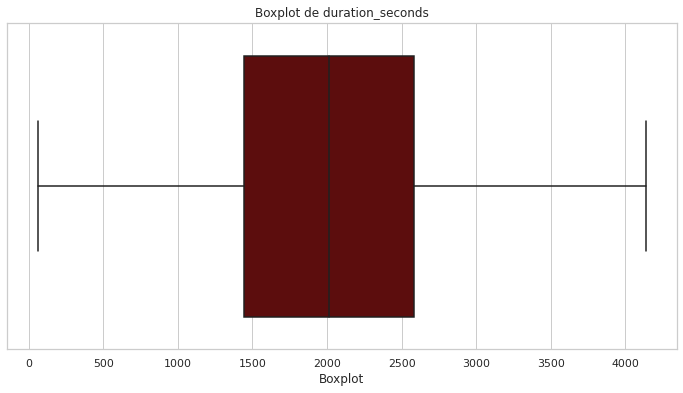

In [74]:
# boxplot suavizado
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_viagens_without_outliers, x='duration_seconds')
plt.title('Boxplot de duration_seconds')
plt.xlabel('Boxplot')
plt.show()

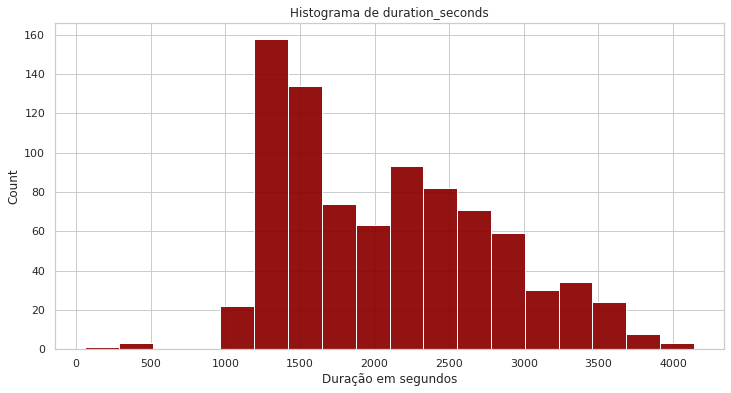

In [75]:
# histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df_viagens_without_outliers, x='duration_seconds', color='darkred', alpha=0.93)
plt.title('Histograma de duration_seconds')
plt.xlabel('Duração em segundos')
plt.show()

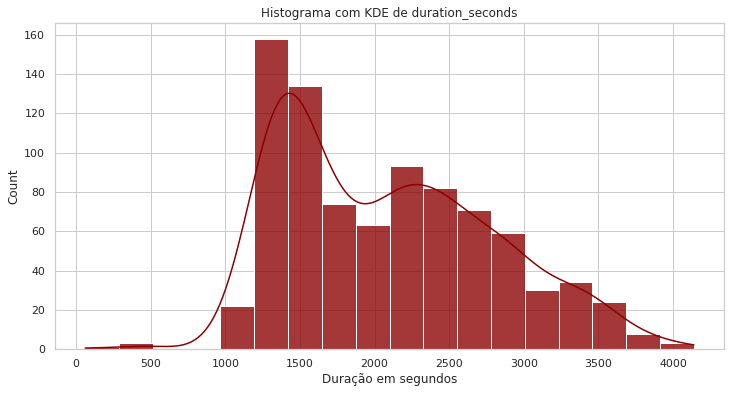

In [76]:
# densidade
plt.figure(figsize=(12, 6))
sns.histplot(data=df_viagens_without_outliers, x='duration_seconds', color='darkred', alpha=0.78, kde=True)
plt.title('Histograma com KDE de duration_seconds')
plt.xlabel('Duração em segundos')
plt.show()

#### Agrupando por condições climáticas e analisando

In [77]:
# métricas agrupadas
grouped_clima_condicao = df_viagens_without_outliers.groupby('weather_conditions')['duration_seconds'].agg(['mean', 'median', 'sum'])
grouped_clima_condicao

mean  median        sum
weather_conditions                                
Bad                 2391.741497  2460.0   351586.0
Good                2024.296348  1896.0  1441299.0

*Percebemos que quando as condições climáticas estão ruins, a média e a mediana da duração das viagens é maior. Em contrapartida, no somatório geral, quando o tempo está bom, as pessoas viajam mais.*

#### Separando data de hora

In [78]:
# separando, formatando e recortando...
df_viagens_without_outliers['date'] = df_viagens_without_outliers['start_ts'].dt.date
df_viagens_without_outliers['date'] = pd.to_datetime(df_viagens_without_outliers['date'])
df_viagens_without_outliers['day'] = df_viagens_without_outliers['date'].dt.day
df_viagens_without_outliers.drop('date', axis=1, inplace=True)

/tmp/ipykernel_194/1593104738.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_194/1593104738.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_194/1593104738.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3

In [79]:
# transformando e simplificando...
df_viagens_without_outliers['start_ts'] = pd.to_datetime(df_viagens_without_outliers['start_ts'])
df_viagens_without_outliers['hour'] = df_viagens_without_outliers['start_ts'].dt.strftime('%H')
df_viagens_without_outliers['hour'] = pd.to_numeric(df_viagens_without_outliers['hour'], errors='coerce')

/tmp/ipykernel_194/2025298400.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_194/2025298400.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_194/2025298400.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
# criando coluna duration_minutes
df_viagens_without_outliers['duration_minutes'] = df_viagens_without_outliers['duration_seconds'] / 60

/tmp/ipykernel_194/590276702.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
# reordenando
new_order = ['weather_conditions', 'day', 'hour', 'duration_seconds', 'duration_minutes', 'start_ts']
df_viagens_without_outliers = df_viagens_without_outliers[new_order]

df_viagens_without_outliers

weather_conditions  day  hour  duration_seconds  duration_minutes  \
0                  Good   25    16            2410.0         40.166667   
1                  Good   25    14            1920.0         32.000000   
2                  Good   25    12            1543.0         25.716667   
3                  Good    4    10            2512.0         41.866667   
4                  Good   11     7            1440.0         24.000000   
...                 ...  ...   ...               ...               ...   
1059               Good   11    10            1303.0         21.716667   
1060               Good    4    14            2700.0         45.000000   
1061                Bad   18    16            2186.0         36.433333   
1064               Good   11    10            1318.0         21.966667   
1067                Bad    4    16            2834.0         47.233333   

                start_ts  
0    2017-11-25 16:00:00  
1    2017-11-25 14:00:00  
2    2017-11-25 12:00:00  
3    2017-11-04 10:00:00  
4    2017-11-11 07:00:00  
...                  ...  
1059 2017-11-11 10:00:00  
1060 2017-11-04 14:00:00  
1061 2017-11-18 16:00:00  
1064 2017-11-11 10:00:00  
1067 2017-11-04 16:00:00  

[859 rows x 6 columns]

In [82]:
# verificando valores únicos das novas colunas day e hour
df_viagens_without_outliers.hour.unique()

array([16, 14, 12, 10,  7,  4, 11,  6,  8, 13, 20, 17,  9,  5, 19, 18, 15,
       21,  3, 22,  0,  2, 23])

In [83]:
df_viagens_without_outliers.day.unique()

array([25,  4, 11, 18])

#### Separando em 2 grupos por condição climática

In [84]:
# filtrando...
df_good = df_viagens_without_outliers.loc[df_viagens_without_outliers['weather_conditions'] == 'Good']
df_bad = df_viagens_without_outliers.loc[df_viagens_without_outliers['weather_conditions'] == 'Bad']

In [85]:
# comparando os tamanhos de df_good
len(df_good) / df_viagens_without_outliers.shape[0]

0.8288707799767171

In [86]:
# com df_bad
len(df_bad) / df_viagens_without_outliers.shape[0]

0.17112922002328287

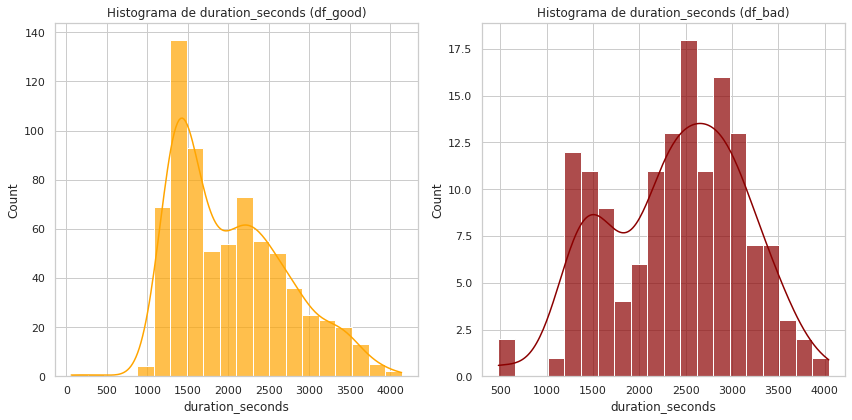

In [87]:
# histogramas de df_good (blue) e df_bad(red)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
sns.histplot(data=df_good, x="duration_seconds", bins=20, color='orange', alpha=0.70, kde=True)
plt.title("Histograma de duration_seconds (df_good)")

plt.subplot(1, 2, 2)  
sns.histplot(data=df_bad, x="duration_seconds", bins=20, color='darkred', alpha=0.70, kde=True)
plt.title("Histograma de duration_seconds (df_bad)")
plt.tight_layout()
plt.show()

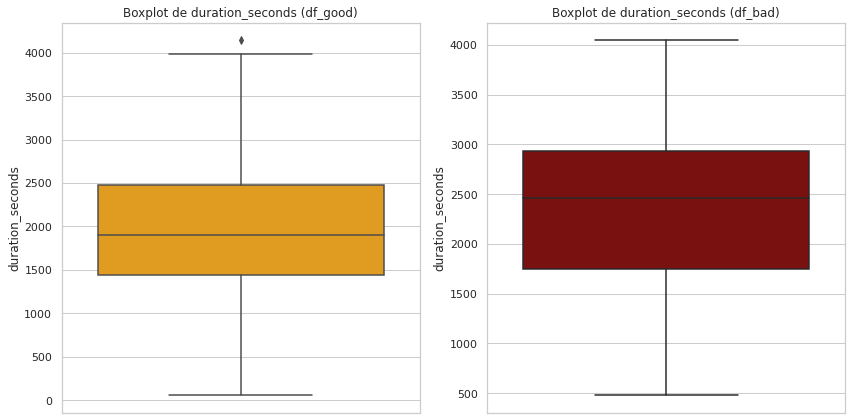

In [88]:
# boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_good, y="duration_seconds", color='orange')
plt.title("Boxplot de duration_seconds (df_good)")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_bad, y="duration_seconds", color='darkred')
plt.title("Boxplot de duration_seconds (df_bad)")

plt.tight_layout()
plt.show()

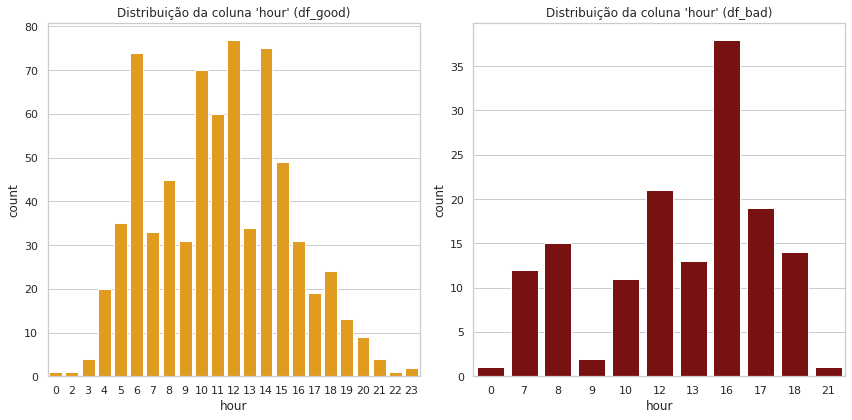

In [89]:
# histogramas por hora
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_good, x="hour", color="orange")
plt.title("Distribuição da coluna 'hour' (df_good)")

plt.subplot(1, 2, 2)
sns.countplot(data=df_bad, x="hour", color="darkred")
plt.title("Distribuição da coluna 'hour' (df_bad)")

plt.tight_layout()
plt.show()

*Verificamos aqui um frequência de horários muito mais abrangente e mais requisições de viagens em horários distintos quando o clima está bom.*

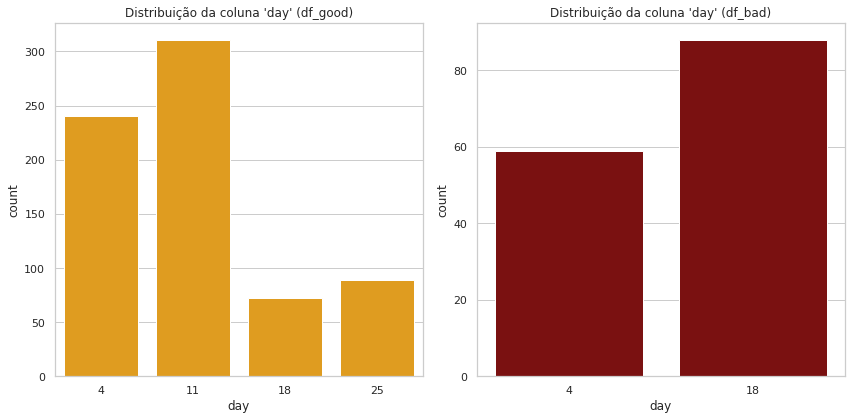

In [90]:
# plot por day
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_good, x="day", color="orange")
plt.title("Distribuição da coluna 'day' (df_good)")

plt.subplot(1, 2, 2)
sns.countplot(data=df_bad, x="day", color="darkred")
plt.title("Distribuição da coluna 'day' (df_bad)")

plt.tight_layout()
plt.show()

*Notamos aqui que a pessoas viajam bastante aos sábados, já que todas as datas analisadas são sábados de 2017 do mês de Novembro, ainda mais quando o tempo está `good`.*

*Houve alternância do status do clima ao longo do sábado dia 4 e 18 do mês analisado.*

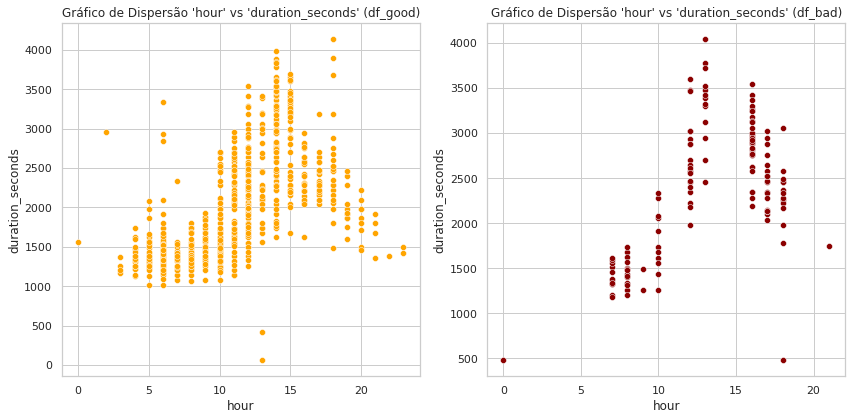

In [91]:
# plot de dispersão
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_good, x="hour", y="duration_seconds", color="orange")
plt.title("Gráfico de Dispersão 'hour' vs 'duration_seconds' (df_good)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_bad, x="hour", y="duration_seconds", color="darkred")
plt.title("Gráfico de Dispersão 'hour' vs 'duration_seconds' (df_bad)")

plt.tight_layout()
plt.show()

*Quando temos tempo `good`, as solicitações de corridas começam bem cedo aos Sábados, antes das 5h da manhã já percebemos uma demanda, que em tempo `bad` não há.*

*Ambas apresentam pico entre os horários entre 11h e 14h.*

#### Transformando coluna `weather_conditions` para formato binário

In [92]:
# transformando
df_viagens_without_outliers['weather_conditions'] = df_viagens_without_outliers['weather_conditions'].replace({'Good': 1, 'Bad': 0})

In [93]:
# verificando...
df_viagens_without_outliers.head()

weather_conditions  day  hour  duration_seconds  duration_minutes  \
0                   1   25    16            2410.0         40.166667   
1                   1   25    14            1920.0         32.000000   
2                   1   25    12            1543.0         25.716667   
3                   1    4    10            2512.0         41.866667   
4                   1   11     7            1440.0         24.000000   

             start_ts  
0 2017-11-25 16:00:00  
1 2017-11-25 14:00:00  
2 2017-11-25 12:00:00  
3 2017-11-04 10:00:00  
4 2017-11-11 07:00:00

In [94]:
# correlação entre a hora do dia e o tempo das viagens
correlation_matrix = df_viagens_without_outliers[['hour', 'duration_seconds']].corr()

correlation_matrix

hour  duration_seconds
hour              1.000000          0.595145
duration_seconds  0.595145          1.000000

*Temos uma boa correlação com a coluna `hour` e `duration`.*

## Testando as hipóteses

### Teste de hipótese para determinar se a duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos

**Definindo:**

- *Hipótese Nula (H0): A duração média dos passeios não muda nos sábados chuvosos.*
- *Hipótese Alternativa (H1): A duração média dos passeios muda nos sábados chuvosos.*

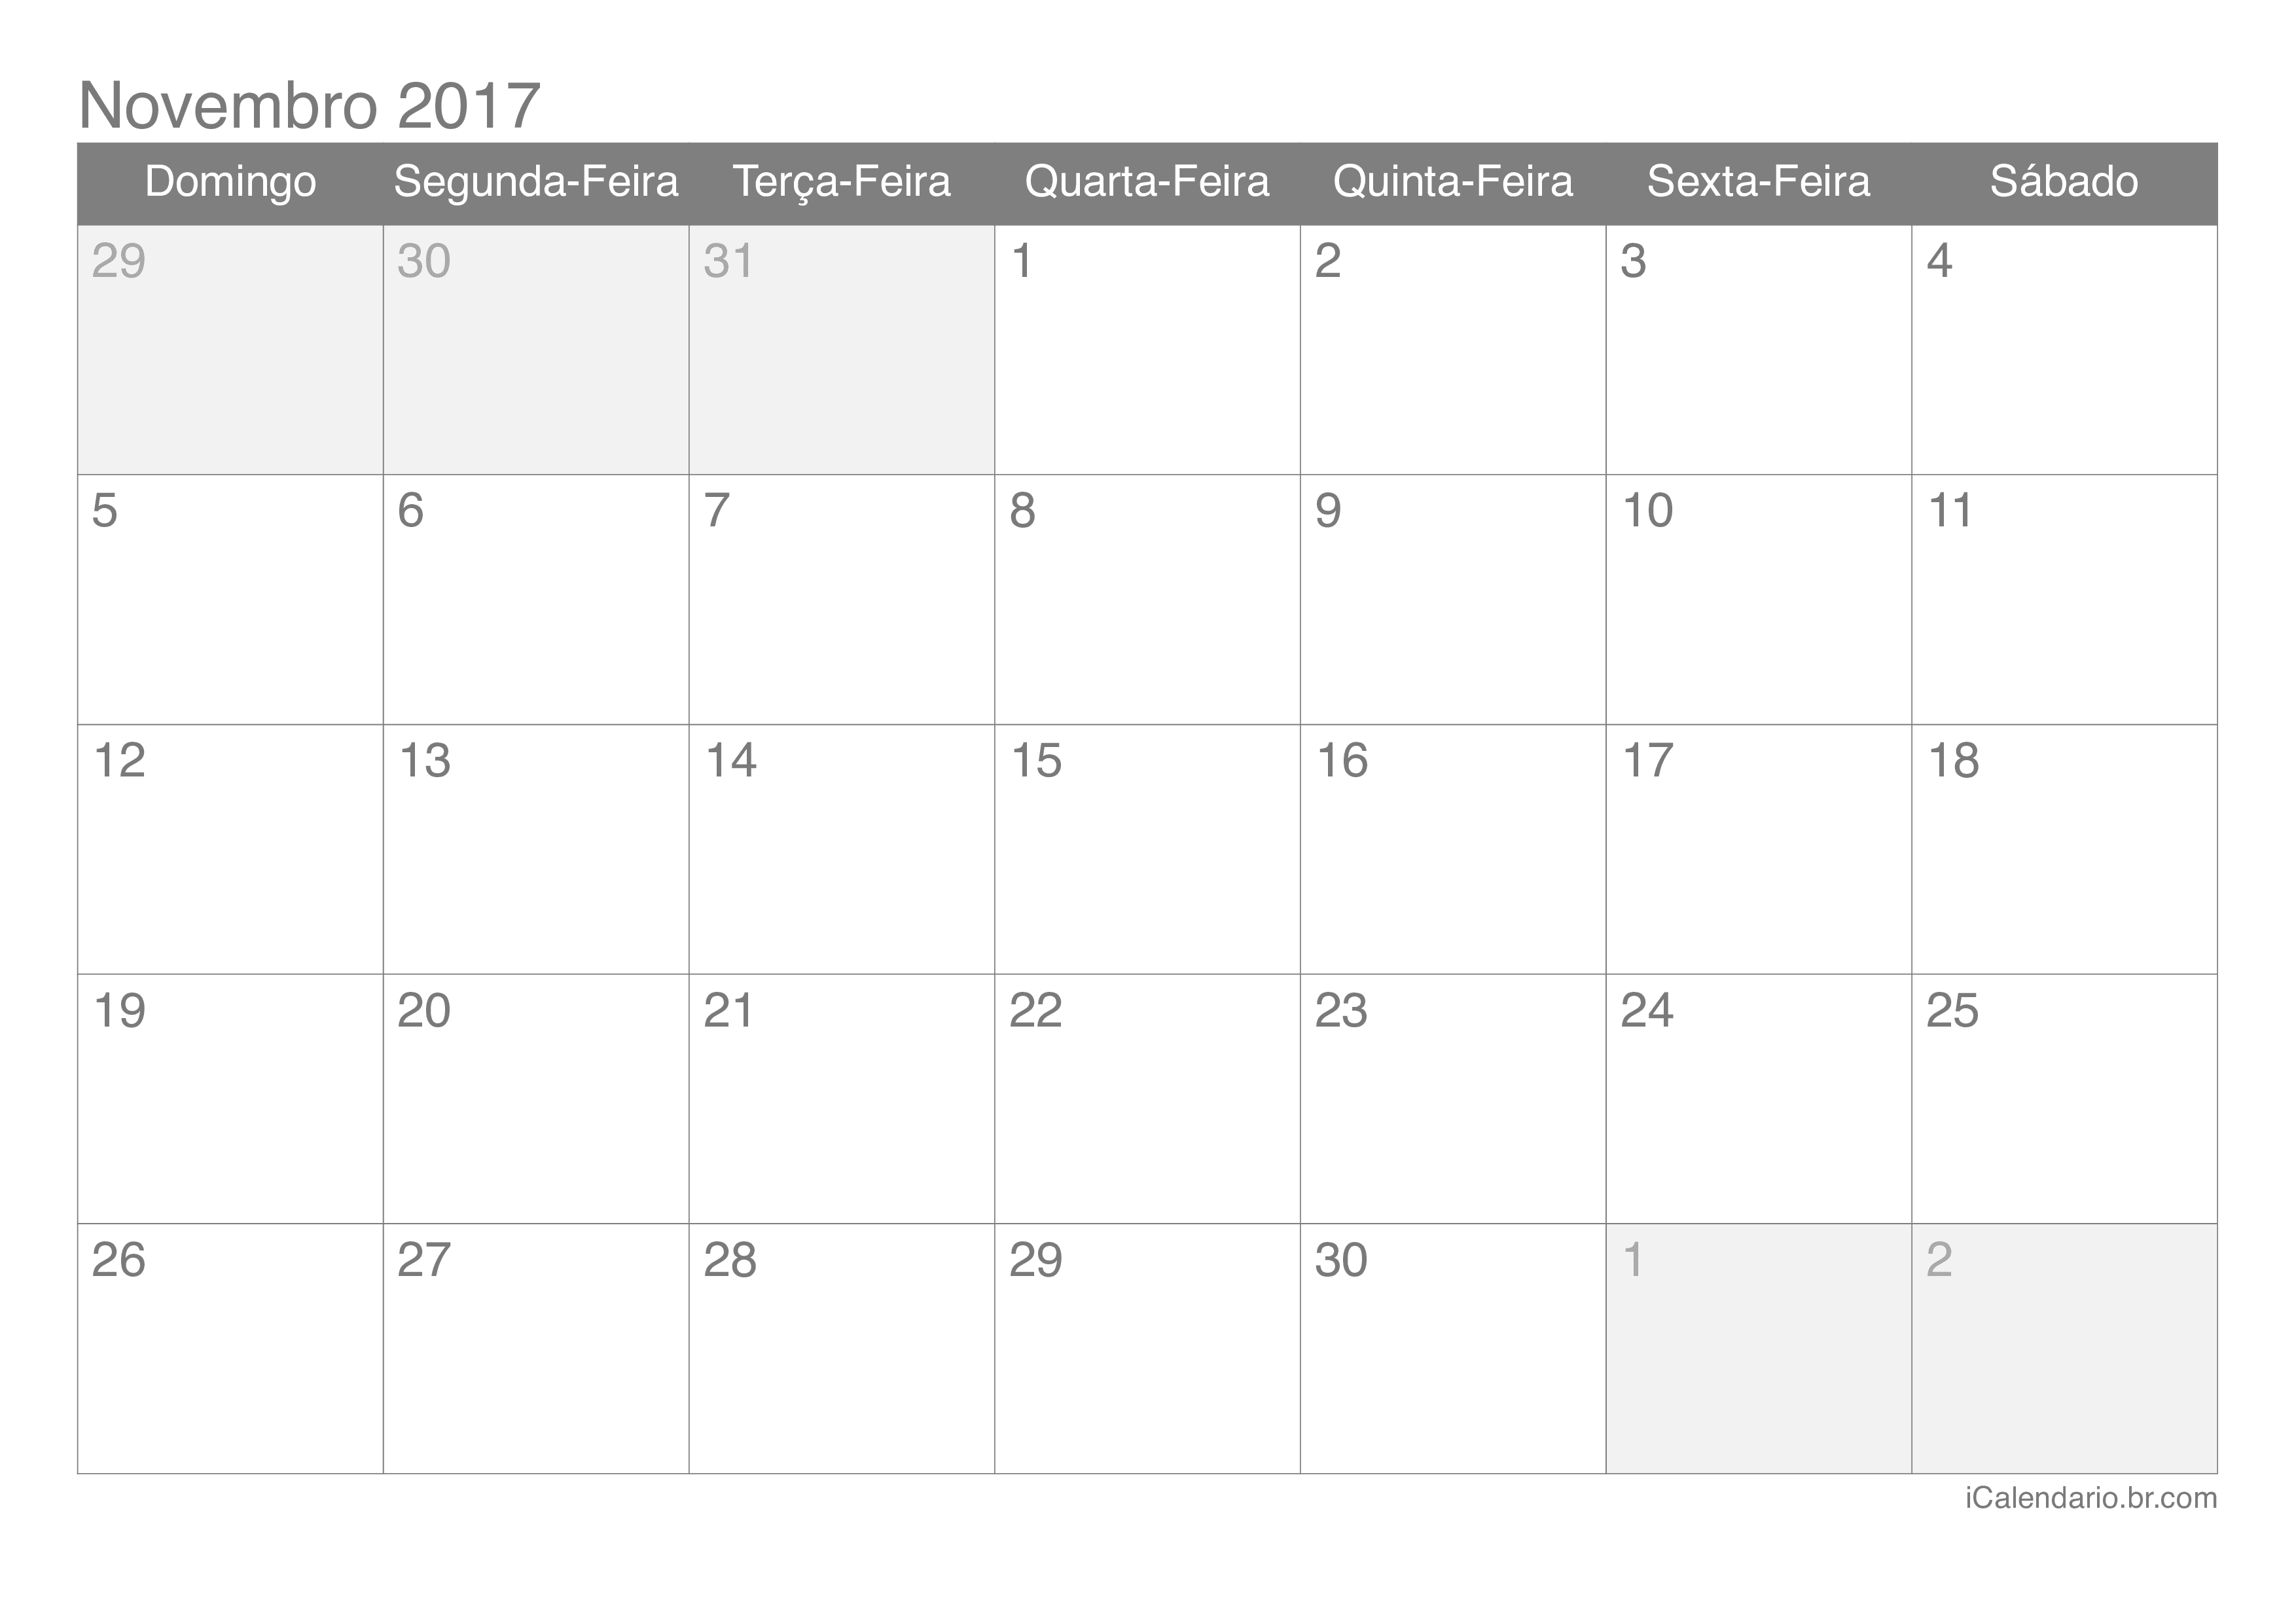

*As datas contidas nas informações do dataset são todas referentes a Sábados no ano de 2017, conforme imagem acima.*

In [95]:
# chamando df_bad e df_good
df_bad.info()
print()
df_bad.head()
print()
df_good.info()
print()
df_good.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 6 to 1067
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   weather_conditions  147 non-null    object        
 1   day                 147 non-null    int64         
 2   hour                147 non-null    int64         
 3   duration_seconds    147 non-null    float64       
 4   duration_minutes    147 non-null    float64       
 5   start_ts            147 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 12.1+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 1064
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   weather_conditions  712 non-null    object        
 1   day                 712 non-null    int64         
 2   hour                712 non-n

weather_conditions  day  hour  duration_seconds  duration_minutes  \
0               Good   25    16            2410.0         40.166667   
1               Good   25    14            1920.0         32.000000   
2               Good   25    12            1543.0         25.716667   
3               Good    4    10            2512.0         41.866667   
4               Good   11     7            1440.0         24.000000   

             start_ts  
0 2017-11-25 16:00:00  
1 2017-11-25 14:00:00  
2 2017-11-25 12:00:00  
3 2017-11-04 10:00:00  
4 2017-11-11 07:00:00

*Temos amostras não pareadas e uma delas apresenta poucos dados.*

In [96]:
# algumas métricas antes de realizar o teste...
mean_duration_good = df_good['duration_seconds'].mean()
median_duration_good = df_good['duration_seconds'].median()
std_duration_good = df_good['duration_seconds'].std()
var_duration_good = df_good['duration_seconds'].var()

In [97]:
mean_duration_bad = df_bad['duration_seconds'].mean()
median_duration_bad = df_bad['duration_seconds'].median()
std_duration_bad = df_bad['duration_seconds'].std()
var_duration_bad = df_bad['duration_seconds'].var()

In [98]:
print('Clima Good')
print("Média:", mean_duration_good)
print("Mediana:", median_duration_good)
print("Desvio Padrão:", std_duration_good)
print("Variância:", var_duration_good)

Clima Good
Média: 2024.2963483146068
Mediana: 1896.0
Desvio Padrão: 688.1860688501046
Variância: 473600.0653593609


In [99]:
print('Clima Bad')
print("Média:", mean_duration_bad)
print("Mediana:", median_duration_bad)
print("Desvio Padrão:", std_duration_bad)
print("Variância:", var_duration_bad)

Clima Bad
Média: 2391.7414965986395
Mediana: 2460.0
Desvio Padrão: 723.2661846195931
Variância: 523113.9738141833


In [100]:
# separando amostras
amostra_bad = df_bad['duration_seconds']
amostra_good = df_good['duration_seconds']

#### *Verificando a variância das amostras*

In [101]:
# usando o teste de levene
statistic, p_value = st.levene(amostra_bad, amostra_good)

print("Estatística do teste de Levene:", statistic)
print("p-valor do teste de Levene:", p_value)

if p_value < 0.05:
    print("As variâncias são significativamente diferentes.")
else:
    print("Não há evidência significativa de diferença nas variâncias.")

Estatística do teste de Levene: 0.254660327673561
p-valor do teste de Levene: 0.6139422729176379
Não há evidência significativa de diferença nas variâncias.


### *Aplicando t-student*

In [102]:
# definindo alpha
alpha = 0.05

# aplicando teste t-student com o parâmetro equal_var = True
t_statistic, p_value = st.ttest_ind(amostra_bad, amostra_good, equal_var=True)
print(f'P-Value: {p_value}')

if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0): A duração média dos passeios muda nos sábados chuvosos em comparação com os sábados não chuvosos.")
else:
    print("Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que a duração média dos passeios muda nos sábados chuvosos.")

P-Value: 7.325186215819195e-09
Rejeitamos a hipótese nula (H0): A duração média dos passeios muda nos sábados chuvosos em comparação com os sábados não chuvosos.


*Vamos reforçar nosso teste de hipóteses realizando um bootstrap com as amostras.*

In [103]:
# médias observadas
observed_diff = np.mean(amostra_bad) - np.mean(amostra_good)

In [104]:
# ciclo for com mil amostras e reposição
bootstrap_diffs = []
num_bootstraps = 1000

for i in range(num_bootstraps):
    bootstrap_sample_1 = np.random.choice(amostra_bad, len(amostra_bad), replace=True)
    bootstrap_sample_2 = np.random.choice(amostra_good, len(amostra_good), replace=True)
    
    bootstrap_diff = np.mean(bootstrap_sample_1) - np.mean(bootstrap_sample_2)
    bootstrap_diffs.append(bootstrap_diff)

In [105]:
# intervalo de confiança de 95%
confidence_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])

if confidence_interval[0] <= observed_diff <= confidence_interval[1]:
    print("Rejeitamos a hipótese nula (H0): A duração média dos passeios muda nos sábados chuvosos em comparação com os sábados não chuvosos.")
else:
    print("Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que a duração média dos passeios muda nos sábados chuvosos.")

Rejeitamos a hipótese nula (H0): A duração média dos passeios muda nos sábados chuvosos em comparação com os sábados não chuvosos.


*Confirmamos o mesma hipótese após o bootstrap.*

## Conclusão Geral

*Nossa jornada de análise de dados nos levou a descobrir insights valiosos sobre as preferências dos passageiros e o impacto do clima nas corridas de táxi. À medida que exploramos os dados, desvendamos padrões que nos permitirão aprimorar nossos serviços e tornar as viagens mais agradáveis para nossos passageiros.*

*Nossa análise revelou que a `Flash Cab` é uma empresa consolidada com uma alta demanda por viagens, sugerindo que eles possuem uma frota considerável. Além disso, companhias afiliadas e associadas também desempenham um papel importante no setor.*

*Identificamos os destinos mais requisitados, com áreas centrais da cidade, como `River North`, `Streeterville`, `West Loop` e `Loop`, consistentemente no Top 10. Esses insights nos orientam a melhor posicionar nossa frota no distrito de negócios de Chicago, onde a demanda é mais alta. Nossa análise também revelou que algumas corridas com tempo de duração igual a zero foram canceladas ou tiveram problemas na extração de dados, e também tomamos medidas para tratar os devidos outliers nos dados.*

*Geramos diversos gráficos para ilustrar nossas análises, dividimos as companhias em grupos e identificamos que, se quisermos atingir a liderança no setor, devemos nos inspirar nas empresas que se encontram no primeiro quartil (Q1) das métricas de desempenho. Além disso, constatamos que é relevante estabelecer associações e afiliações, considerando a média de viagens. Nossos estudos mostram que as condições climáticas impactam diretamente o comportamento dos usuários, afetando os horários, a frequência de uso e a duração das viagens.*

*Concluímos que em dias ruins, as viagens tendem a ser mais longas, enquanto em dias bons, os clientes utilizam mais os táxis. Nossos gráficos de dispersão destacaram demandas de horários específicos, com picos notáveis durante o horário de almoço e início da manhã, dependendo das condições climáticas.*

*Verificamos que a hora do dia tem uma influência significativa na duração da viagem, conforme evidenciado pela matriz de correlação que geramos. Além disso, testamos a hipótese de que a duração média das viagens do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos em comparação com os sábados não chuvosos. Nossos testes utilizando o método t-Student rejeitaram a hipótese nula, confirmando que a duração média das viagens realmente varia nos sábados chuvosos.*

*Para reforçar nossos resultados, aplicamos o método bootstrap e obtivemos os mesmos resultados, validando assim nossa análise.*